[데이콘 유전체 정보 품종 분류 AI 경진대회](https://dacon.io/competitions/official/236035/overview/description)
- SNP(유전체 변이 정보)를 이용하여 개체 품종 분류하기

## 1. RandomForestClassifier로 예측하기

In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [ ]:
class CFG:
    SEED = 42

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

### 데이터 불러오기

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI/Week_04/datasets/snp/train.csv')
test = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI/Week_04/datasets/snp/test.csv')

In [ ]:
train.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


In [ ]:
train['SNP_01'].value_counts()

G G    141
A G     71
A A     50
Name: SNP_01, dtype: int64

In [ ]:
train['class'].value_counts()

B    114
C     79
A     69
Name: class, dtype: int64

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

In [ ]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

In [ ]:
train_x

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,0,0,0,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A
1,0,0,0,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A
2,0,0,0,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A
3,0,0,0,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G
4,0,0,0,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0,0,2,A G,A G,A A,G A,C C,A G,A A,G A,A A,G G,A G,G A,A A,A A,A A
258,0,0,0,2,G G,A A,C A,A A,A A,A G,G A,G A,A A,A G,A G,A A,A G,A A,G A
259,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A A,G G,G G,G G,C A,G G
260,0,0,0,1,A A,G G,A A,G A,A A,G G,G G,A A,G A,A G,A G,G A,G G,C A,G G


### 데이터 전처리

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [ ]:
snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)

In [ ]:
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

LabelEncoder()

In [ ]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

In [ ]:
train_x

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,0,0,0,2,5,1,0,4,2,0,0,5,0,5,1,0,0,0,0
1,0,0,0,2,1,1,2,0,0,1,0,4,0,1,0,4,5,0,0
2,0,0,0,2,5,5,0,4,3,5,0,4,4,1,0,0,0,0,0
3,0,0,0,1,0,5,0,4,0,5,5,0,5,1,5,5,5,0,5
4,0,0,0,2,5,5,3,0,3,0,0,0,0,5,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0,0,2,1,1,0,4,3,1,0,4,0,5,1,4,0,0,0
258,0,0,0,2,5,0,2,0,0,1,4,4,0,1,1,0,1,0,4
259,0,0,0,1,1,5,0,4,0,1,5,4,4,0,5,5,5,2,5
260,0,0,0,1,0,5,0,4,0,5,5,0,4,1,1,4,5,2,5


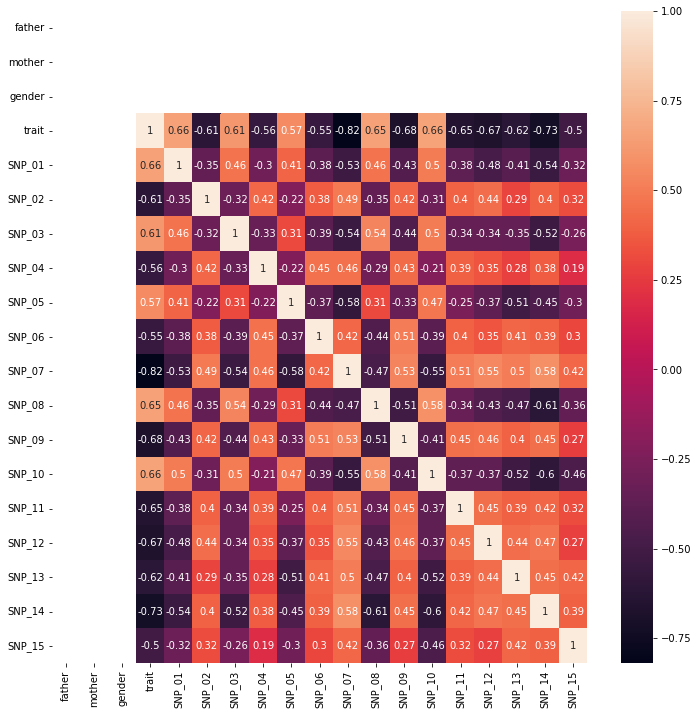

In [ ]:
# train 변수 간 상관관계
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(data = train_x.corr(), annot=True)

### 모델 학습
- 그리드서치 이용해서 최적의 파라미터 찾기

In [ ]:
# 교차 검증 - train/val 데이터셋 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=32)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(209, 19) (209,)
(53, 19) (53,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [100, 300],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9426


In [ ]:
clf = RandomForestClassifier(
    random_state=CFG.SEED,
    max_depth=6, 
    min_samples_leaf=8, 
    min_samples_split=8, 
    n_estimators=100
    )
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       random_state=42)

### 모델 예측 및 평가

In [ ]:
preds = clf.predict(test_x)

In [ ]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9434


In [ ]:
# 그리드 서치
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9245


### 파일 제출

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI/Week_04/datasets/snp/sample_submission.csv')
submit['class'] = class_le.inverse_transform(preds)
submit.to_csv('/content/submit.csv', index=False)

## 2. DNN으로 예측하기

In [ ]:
# 라이브러리 로딩
import random
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

# 랜덤 시드 고정
SEED = 12
random.seed(SEED)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI/Week_04/datasets/snp/train.csv')
test = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI/Week_04/datasets/snp/test.csv')

print(train.shape)
print(test.shape)

(262, 21)
(175, 20)


In [ ]:
X_train.shape

(209, 19)

In [ ]:
y_train.shape

(209,)

In [ ]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

X_train, y_train = get_x_y(train)
X_test = get_x_y(test)

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

snp_data = []
for col in snp_col:
    snp_data += list(X_train[col].values)

y_train = class_le.fit_transform(y_train)
snp_le.fit(snp_data)

for col in X_train.columns:
    if col in snp_col:
        X_train[col] = snp_le.transform(X_train[col])
        X_test[col] = snp_le.transform(X_test[col])

In [ ]:
print(X_train.shape)
print(y_train.shape)

(262, 19)
(262,)


In [ ]:
# DNN 모델 구현
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(train_data, train_target):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_dim=train_data.shape[1]))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['acc', 'mae'])
  
  return model

model = build_model(X_train, y_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               2560      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trai

In [ ]:
#  early stopping으로 오버피팅이 발생하기 전에 학습을 정지시킴
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, batch_size=32, epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=2)

Epoch 1/200
9/9 - 0s - loss: 0.0000e+00 - acc: 0.4351 - mae: 0.5649 - val_loss: 0.0000e+00 - val_acc: 0.5283 - val_mae: 0.4717 - 70ms/epoch - 8ms/step
Epoch 2/200
9/9 - 0s - loss: 0.0000e+00 - acc: 0.4351 - mae: 0.5649 - val_loss: 0.0000e+00 - val_acc: 0.5283 - val_mae: 0.4717 - 32ms/epoch - 4ms/step
Epoch 3/200
9/9 - 0s - loss: 0.0000e+00 - acc: 0.4351 - mae: 0.5649 - val_loss: 0.0000e+00 - val_acc: 0.5283 - val_mae: 0.4717 - 29ms/epoch - 3ms/step
Epoch 4/200
9/9 - 0s - loss: 0.0000e+00 - acc: 0.4351 - mae: 0.5649 - val_loss: 0.0000e+00 - val_acc: 0.5283 - val_mae: 0.4717 - 32ms/epoch - 4ms/step
Epoch 5/200
9/9 - 0s - loss: 0.0000e+00 - acc: 0.4351 - mae: 0.5649 - val_loss: 0.0000e+00 - val_acc: 0.5283 - val_mae: 0.4717 - 30ms/epoch - 3ms/step
Epoch 6/200
9/9 - 0s - loss: 0.0000e+00 - acc: 0.4351 - mae: 0.5649 - val_loss: 0.0000e+00 - val_acc: 0.5283 - val_mae: 0.4717 - 34ms/epoch - 4ms/step
Epoch 7/200
9/9 - 0s - loss: 0.0000e+00 - acc: 0.4351 - mae: 0.5649 - val_loss: 0.0000e+00 - v

In [ ]:
model.evaluate(X_val, y_val)

2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - acc: 0.5283 - mae: 0.4717


[0.0, 0.5283018946647644, 0.4716981053352356]

In [ ]:
preds = clf.predict(X_test)

submit = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI/Week_04/datasets/snp/sample_submission.csv')
submit['class'] = class_le.inverse_transform(preds)
submit.to_csv('/content/submit3.csv', index=False)